The first visualization was generated using python. The code used is as follows:

The link to the dataset used is: https://open.toronto.ca/dataset/building-permits-active-permits/

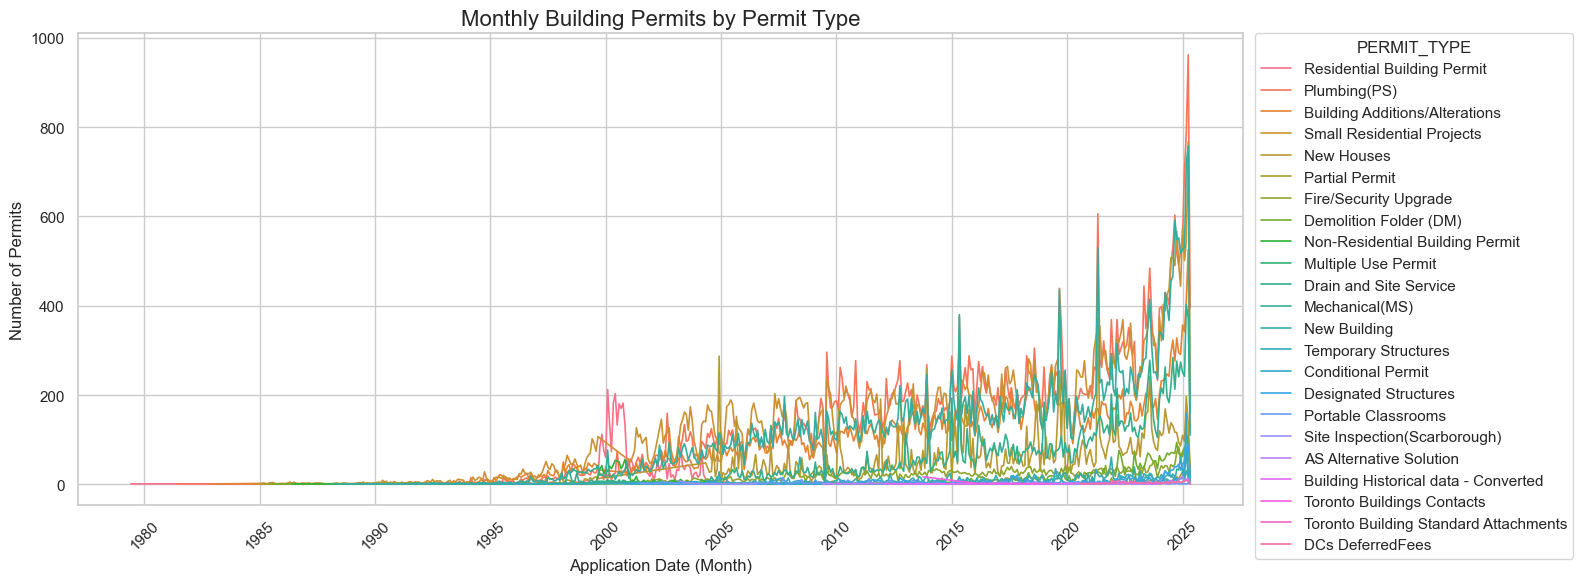

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'building-permits-active-permits.csv'  # update if your file is in a different directory
df = pd.read_csv(file_path, low_memory=False)

# Convert application date to datetime
df['APPLICATION_DATE'] = pd.to_datetime(df['APPLICATION_DATE'], errors='coerce')

# Drop rows with missing or unparseable dates
df = df.dropna(subset=['APPLICATION_DATE'])

# Extract year-month for grouping
df['Month'] = df['APPLICATION_DATE'].dt.to_period('M')

# Group by month and permit type, count permits
monthly_counts = df.groupby(['Month', 'PERMIT_TYPE']).size().reset_index(name='Permit_Count')

# Convert Month back to datetime for plotting
monthly_counts['Month'] = monthly_counts['Month'].dt.to_timestamp()

# Set plot style
sns.set(style='whitegrid', palette='tab20', rc={'figure.figsize': (16, 6)})

# Create the plot
plt.figure(figsize=(16, 6))
sns.lineplot(data=monthly_counts, x='Month', y='Permit_Count', hue='PERMIT_TYPE', linewidth=1.2)

# Titles and labels
plt.title('Monthly Building Permits by Permit Type', fontsize=16)
plt.xlabel('Application Date (Month)', fontsize=12)
plt.ylabel('Number of Permits', fontsize=12)

# Legend outside the plot
plt.legend(title='PERMIT_TYPE', bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

# Format x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The visualization generated looks as follows:

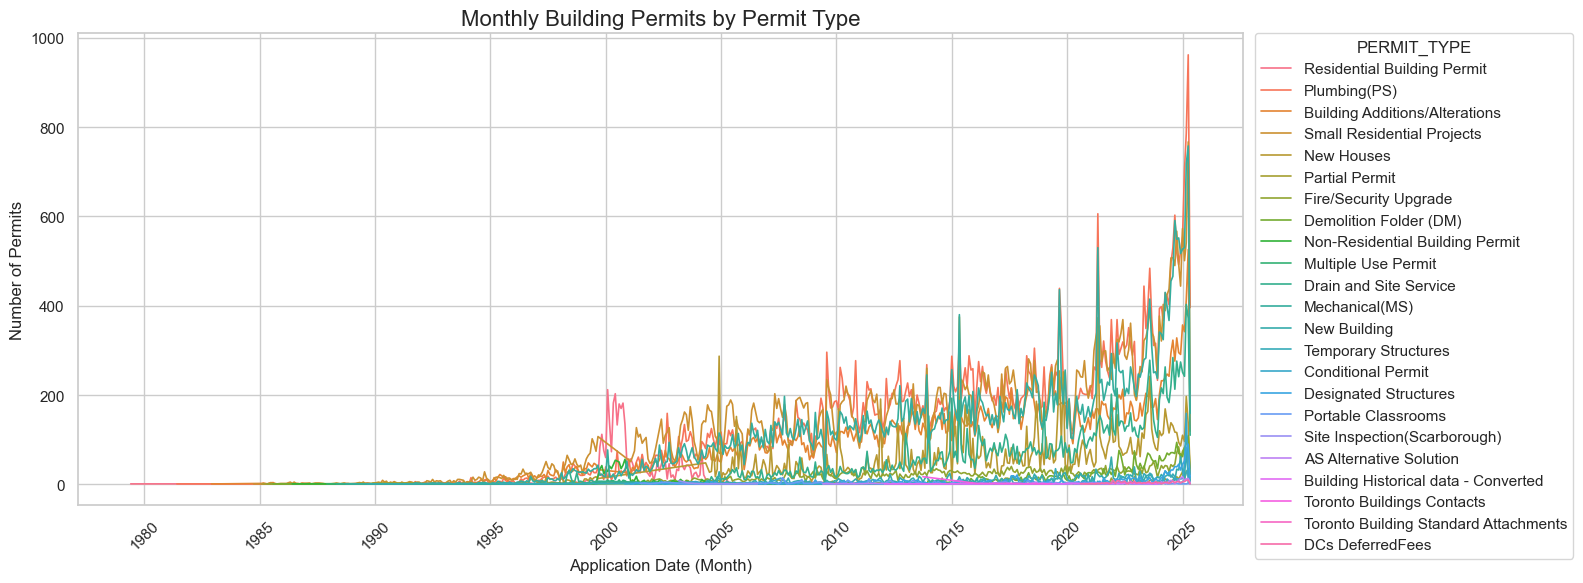

For each visualization, describe and justify:

What software did you use to create your data visualization?
This visualization was created using Python, specifically the Matplotlib and Seaborn libraries, which were selected for their robust handling of time series data and flexible formatting options.

Who is your intended audience?
The intended audience includes city budget analysts, urban planners, construction firms, and policy researchers who are interested in understanding long-term patterns in building permit activity across different categories.

What information or message are you trying to convey with your visualization?
The goal of the visualization is to illustrate how the volume of building permits has changed over time, highlighting trends in different permit types and indicating which categories have seen consistent growth, seasonal fluctuations, or sudden spikes.

What aspects of design did you consider when making your visualization? How did you apply them? With what elements of your plots?
A multi-line time series plot was used to capture and compare temporal trends in permit issuance. Colors were assigned distinctly for each permit type to maintain differentiation, while axis labels and grid lines were added to improve readability. The legend was placed outside the plot area to prevent clutter, and chronological sorting of the x-axis ensures clarity in observing trends over several decades.

How did you ensure that your data visualizations are reproducible? If the tool you used to make your data visualization is not reproducible, how will this impact your data visualization?
The visualization is fully reproducible through Python scripts that take raw permit data, preprocess it, and generate the chart. All tools used are open-source, and with access to the dataset and code, the figure can be recreated exactly.

How did you ensure that your data visualization is accessible?
Accessibility was considered by labeling the axes clearly, avoiding red-green color combinations for colorblind users, and including a large, legible legend. However, further improvements could be made by creating an interactive web-based version with hoverable tooltips and keyboard navigation features for users with visual impairments.

Who are the individuals and communities who might be impacted by your visualization?
This visualization is particularly relevant for construction professionals, urban economists, city residents, and municipal regulators. It allows these stakeholders to assess infrastructure trends, forecast construction needs, and investigate the policy impact on permit issuance rates.

How did you choose which features of your chosen dataset to include or exclude from your visualization?
To maintain clarity, only the permit type and application date were used, with monthly aggregation of the number of permits. This simplification was intentional, enabling a clean and focused visualization without conflating the narrative with cost or location-based variables.

What ‘underwater labour’ contributed to your final data visualization product?
Significant preprocessing was required, including grouping records by month and permit type, dealing with missing dates, and standardizing inconsistent permit names. Temporal smoothing was avoided to preserve granularity, which required additional care in organizing dense line data effectively.